<a href="https://colab.research.google.com/github/SimoneFinessi/geopandas/blob/main/Geopandas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [2]:
%matplotlib inline
import pandas as pd
import geopandas

In [3]:
df=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_admin_0_countries.zip?raw=true")
df.head(1)

iso_a3         name continent     pop_est  gdp_md_est  \
0    AFG  Afghanistan      Asia  34124811.0     64080.0   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...

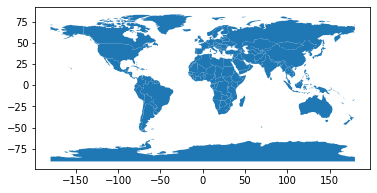

In [ ]:
df.plot()

In [6]:
df2=df[df.continent=="Africa"]

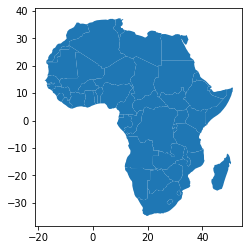

In [7]:
df2.plot()

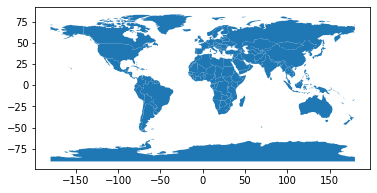

In [8]:
df.geometry.plot()

In [10]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [ ]:
df.geometry.area

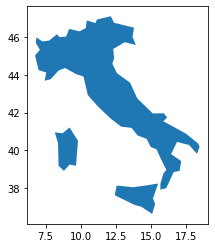

In [ ]:
df[df.name=="Italy"].plot()

In [ ]:
df[df.name=="Italy"].area

<ipython-input-22-6118185a2050>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df[df.name=="Italy"].area


79    34.685652
dtype: float64

In [24]:
cities=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_110m_populated_places.zip?raw=true")

In [26]:
rivers=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/ne_50m_rivers_lake_centerlines.zip?raw=true")

# **The shapely library**

In [16]:
type(df.geometry[0])

shapely.geometry.polygon.Polygon

In [17]:
from shapely.geometry import Point, Polygon, LineString

In [18]:
p = Point(0, 0)

In [19]:
print(p)

POINT (0 0)


In [20]:
polygon = Polygon([(1, 1), (2,2), (2, 1)])

In [21]:
polygon.area

0.5

In [22]:
polygon.distance(p)

1.4142135623730951

[(-40.0, 40.0), (-20.0, 60.0)]

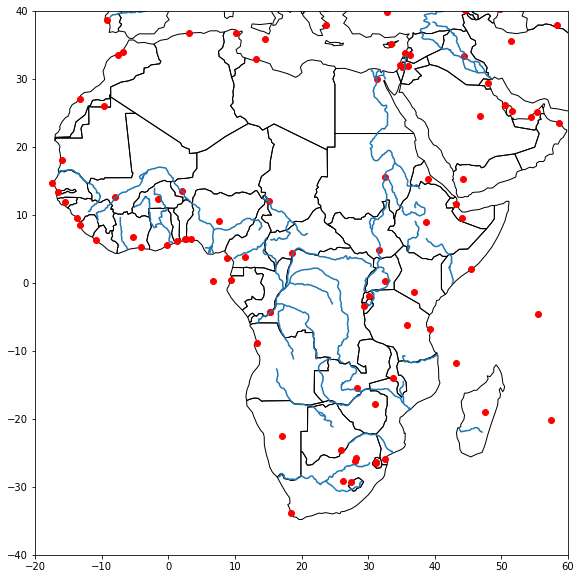

In [27]:
ax = df.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

[(-40.0, 40.0), (-20.0, 60.0)]

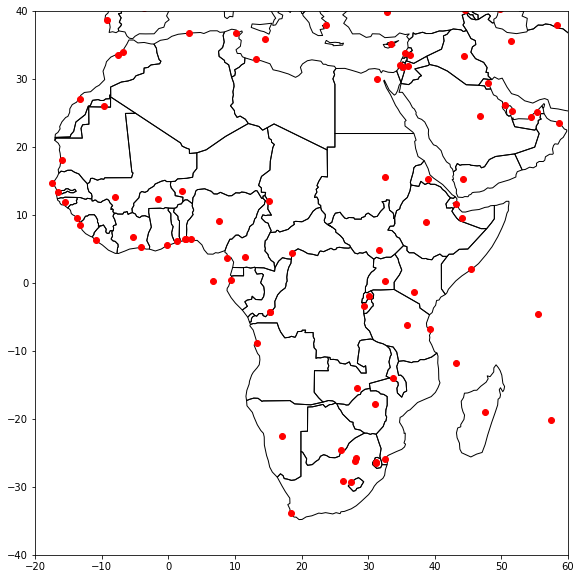

In [ ]:
ax = df.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax, color='red')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

[(36.6, 47.15), (6.7, 18.5)]

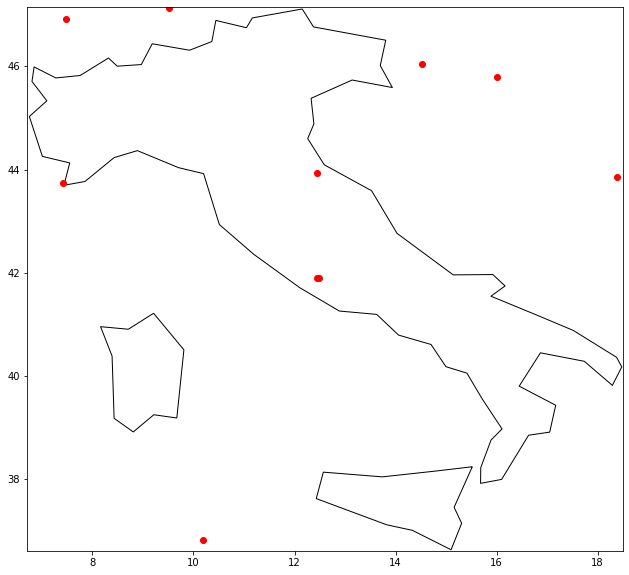

In [ ]:
ax = df[df.name=="Italy"].plot(edgecolor='k', facecolor='none', figsize=(15, 10))
cities.plot(ax=ax, color='red')
ax.set(xlim=(6.7, 18.5), ylim=(36.6, 47.15))

ESERCIZIO 1

In [29]:
stations=geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/paris_bike_stations_mercator.gpkg?raw=true")
stations

name  bike_stands  available_bikes  \
0                     14002 - RASPAIL QUINET           44                4   
1        20503 - COURS DE VINCENNES PYRÉNÉES           21                3   
2                   20011 - PYRÉNÉES-DAGORNO           21                0   
3              31008 - VINCENNES (MONTREUIL)           56                0   
4                43006 - MINIMES (VINCENNES)           28               27   
...                                      ...          ...              ...   
1221                       12011 - CHARENTON           36               35   
1222             13110 - MOULIN DE LA POINTE           22                4   
1223                   07006 - QUAI VOLTAIRE           32               25   
1224  21311 - GAMBETTA (ISSY LES MOULINEAUX)           55               47   
1225                 01020 - RIVOLI CONCORDE           40               37   

                            geometry  
0     POINT (259324.887 6247620.771)  
1     POINT (267824.377 6249062.894)  
2     POINT (267742.135 6250378.469)  
3     POINT (271326.638 6250750.824)  
4     POINT (270594.689 6248007.705)  
...                              ...  
1221  POINT (265227.474 6248579.501)  
1222  POINT (262307.142 6244549.880)  
1223  POINT (259532.287 6250960.774)  
1224  POINT (253646.981 6245637.291)  
1225  POINT (258845.540 6252203.175)  

[1226 rows x 4 columns]

In [30]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [33]:
stations.geometry.head(1)

0    POINT (259324.887 6247620.771)
Name: geometry, dtype: geometry

In [34]:
stations.shape

(1226, 4)

Esercizio 2

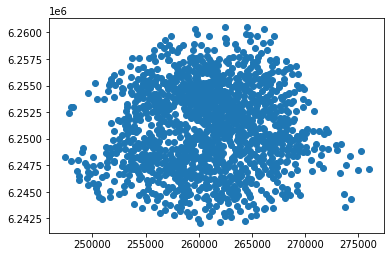

In [35]:
stations.plot()

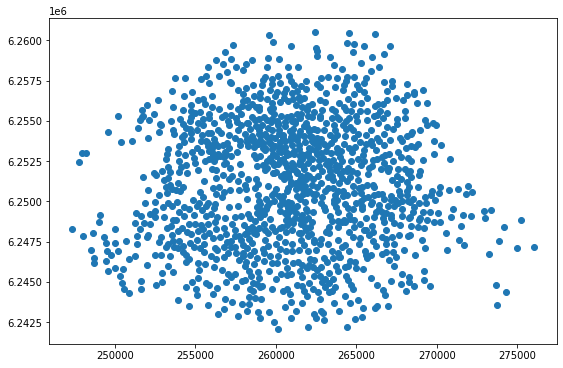

In [37]:
stations.plot(figsize=(12,6))

# **esercizio 3**

In [ ]:
!pip install contextily

In [40]:
import contextily

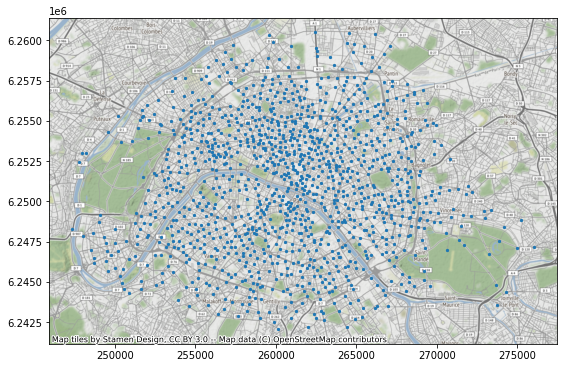

In [47]:
ax=stations.plot(figsize=(12,6),markersize=5)
contextily.add_basemap(ax)

# **esercizio 4**

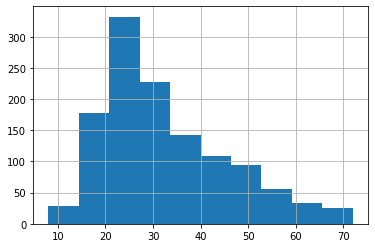

In [50]:
stations["bike_stands"].hist()

# **esercizio 5**

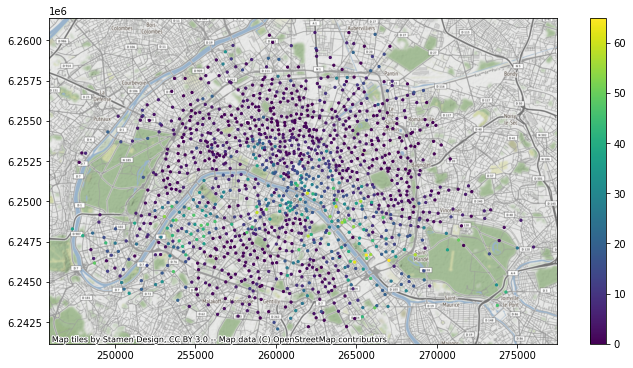

In [58]:
ax=stations.plot(figsize=(12,6),  column="available_bikes", legend=True, markersize=5)
contextily.add_basemap(ax)

# **esercizio 6**

In [59]:
districts = geopandas.read_file("https://raw.githubusercontent.com/jorisvandenbossche/geopandas-tutorial/main/data/paris_districts_utm.geojson")

In [61]:
type(districts)

geopandas.geodataframe.GeoDataFrame

In [60]:
districts.head(1)

id           district_name  population  \
0   1  St-Germain-l'Auxerrois        1672   

                                            geometry  
0  POLYGON ((451922.133 5411438.484, 451922.080 5...

In [63]:
districts.shape

(80, 4)

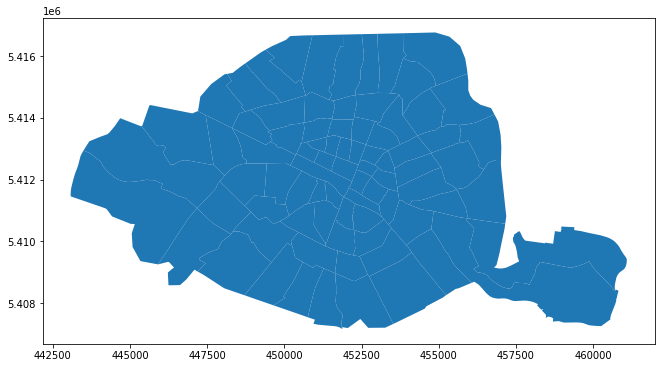

In [64]:
districts.plot(figsize=(12,6))

# **esercizio 7**

In [72]:
districts["area"]=districts.geometry.area /1e6

In [76]:
df3=districts.sort_values(by="area",ascending=False)

In [77]:
df3

id   district_name  population  \
45  46          Picpus       62947   
60  61         Auteuil       67967   
44  45         Bel-Air       33976   
61  62          Muette       45214   
62  63  Porte-Dauphine       27423   
..  ..             ...         ...   
9   10  Enfants-Rouges        8562   
3    4   Place-Vendôme        3044   
5    6        Vivienne        2917   
11  12    Sainte-Avoie        7501   
4    5         Gaillon        1345   

                                             geometry  population_density  \
45  POLYGON ((456790.759 5408686.978, 456841.941 5...         8740.960011   
60  POLYGON ((444930.499 5411923.067, 444957.444 5...        10652.000895   
44  POLYGON ((456987.121 5409120.599, 456996.502 5...         5693.180989   
61  POLYGON ((444686.860 5413985.234, 445358.893 5...         8258.209670   
62  POLYGON ((446548.869 5414236.010, 447025.036 5...         8888.966245   
..                                                ...                 ...   
9   POLYGON ((453580.220 5412266.849, 453591.609 5...        31523.954330   
3   POLYGON ((451004.908 5412654.095, 450960.640 5...        11302.915113   
5   POLYGON ((451686.936 5412747.032, 451682.879 5...        11983.508561   
11  POLYGON ((452928.277 5412227.550, 452830.786 5...        35182.695275   
4   POLYGON ((451328.752 5412991.278, 451294.721 5...         7157.691434   

        area  
45  7.201383  
60  6.380679  
44  5.967841  
61  5.475037  
62  3.085061  
..       ...  
9   0.271603  
3   0.269311  
5   0.243418  
11  0.213201  
4   0.187910  

[80 rows x 6 columns]

# **esercizio 8**

In [65]:
districts["population_density"]=districts.population/districts.geometry.area *10**6

In [ ]:
districts

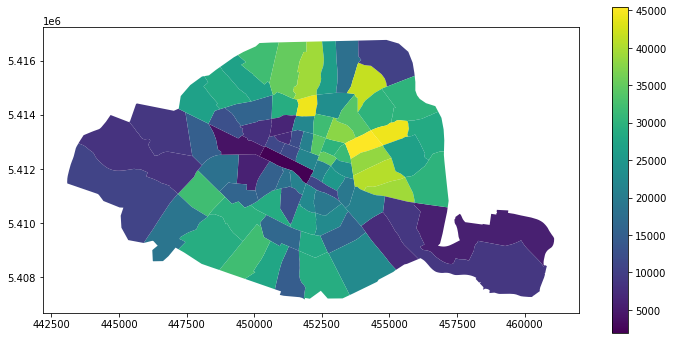

In [70]:
districts.plot(figsize=(12,6),column="population_density",legend=True)

# **esercizi fatti in classe**

In [ ]:
!pip install contextily

In [ ]:
import contextily

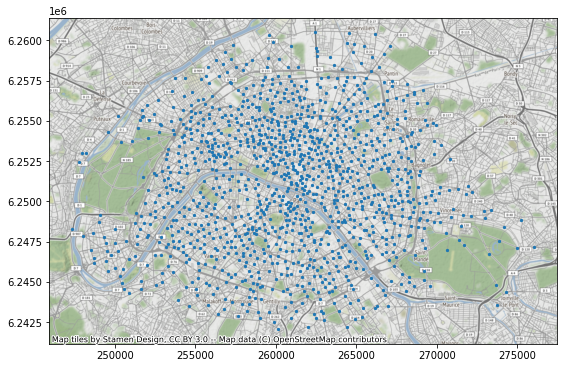

In [ ]:
ax = stations.plot(figsize=(12,6), markersize=5)#marksize diminuisce la grandezza dei pallini
contextily.add_basemap(ax)#aggiunge una mappa sotto al grafico

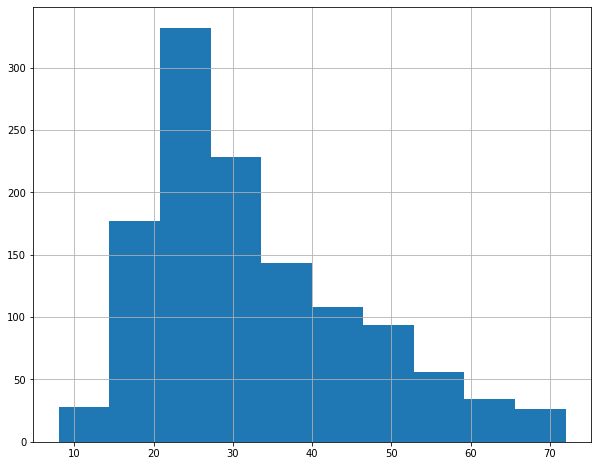

In [ ]:
stations['bike_stands'].hist(figsize=(10,8))

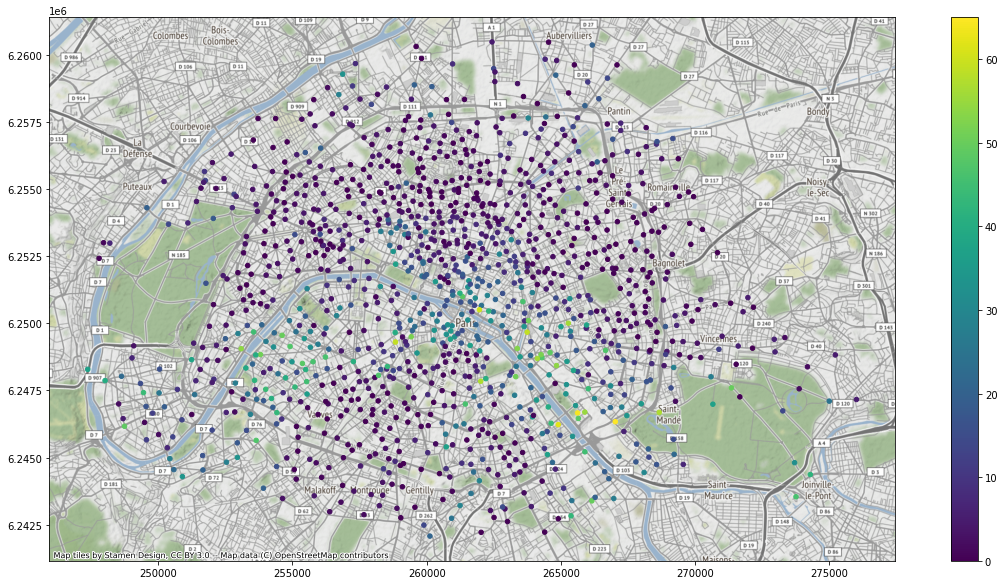

In [ ]:
ax=stations.plot(figsize=(20, 10), column="available_bikes", markersize=20, legend=True)  
contextily.add_basemap(ax)

In [ ]:
districts = geopandas.read_file("https://raw.githubusercontent.com/jorisvandenbossche/geopandas-tutorial/main/data/paris_districts_utm.geojson")

In [ ]:
districts

id           district_name  population  \
0    1  St-Germain-l'Auxerrois        1672   
1    2                  Halles        8984   
2    3            Palais-Royal        3195   
3    4           Place-Vendôme        3044   
4    5                 Gaillon        1345   
..  ..                     ...         ...   
75  76                  Combat       38988   
76  77              Belleville       35773   
77  78           Saint-Fargeau       42087   
78  79           Père-Lachaise       42332   
79  80                Charonne       62901   

                                             geometry  
0   POLYGON ((451922.133 5411438.484, 451922.080 5...  
1   POLYGON ((452278.419 5412160.893, 452192.407 5...  
2   POLYGON ((451553.806 5412340.522, 451528.058 5...  
3   POLYGON ((451004.908 5412654.095, 450960.640 5...  
4   POLYGON ((451328.752 5412991.278, 451294.721 5...  
..                                                ...  
75  POLYGON ((455155.128 5414359.413, 455239.337 5...  
76  POLYGON ((454767.853 5412865.188, 454761.185 5...  
77  POLYGON ((457014.145 5413260.154, 457015.161 5...  
78  POLYGON ((455648.392 5411702.054, 455580.676 5...  
79  POLYGON ((457155.511 5410584.127, 457153.394 5...  

[80 rows x 4 columns]

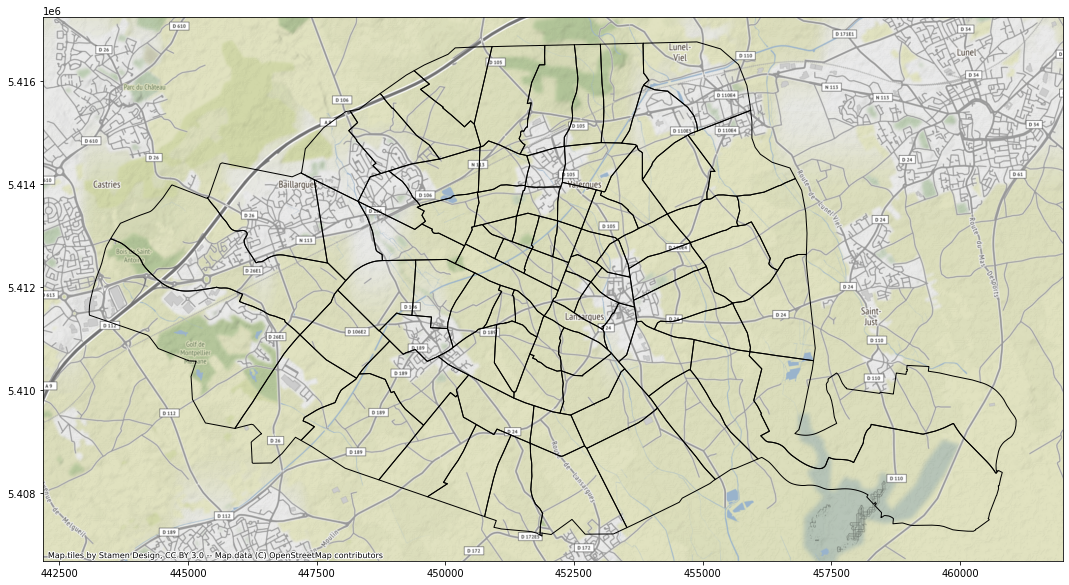

In [ ]:
ax=districts.plot(edgecolor="k",facecolor="none",figsize=(20,10))
contextily.add_basemap(ax)

In [ ]:
districts["area"]=districts.geometry.area /1e6

In [ ]:
districts["population_density"]=districts.population/districts.geometry.area *10**6

In [ ]:
districts

id           district_name  population  \
0    1  St-Germain-l'Auxerrois        1672   
1    2                  Halles        8984   
2    3            Palais-Royal        3195   
3    4           Place-Vendôme        3044   
4    5                 Gaillon        1345   
..  ..                     ...         ...   
75  76                  Combat       38988   
76  77              Belleville       35773   
77  78           Saint-Fargeau       42087   
78  79           Père-Lachaise       42332   
79  80                Charonne       62901   

                                             geometry      area  \
0   POLYGON ((451922.133 5411438.484, 451922.080 5...  0.868538   
1   POLYGON ((452278.419 5412160.893, 452192.407 5...  0.412237   
2   POLYGON ((451553.806 5412340.522, 451528.058 5...  0.273549   
3   POLYGON ((451004.908 5412654.095, 450960.640 5...  0.269311   
4   POLYGON ((451328.752 5412991.278, 451294.721 5...  0.187910   
..                                                ...       ...   
75  POLYGON ((455155.128 5414359.413, 455239.337 5...  1.294254   
76  POLYGON ((454767.853 5412865.188, 454761.185 5...  0.806119   
77  POLYGON ((457014.145 5413260.154, 457015.161 5...  1.486139   
78  POLYGON ((455648.392 5411702.054, 455580.676 5...  1.598127   
79  POLYGON ((457155.511 5410584.127, 457153.394 5...  2.089783   

    population_density  
0          1925.074371  
1         21793.281432  
2         11679.793285  
3         11302.915113  
4          7157.691434  
..                 ...  
75        30123.911627  
76        44376.817729  
77        28319.685707  
78        26488.507305  
79        30099.295856  

[80 rows x 6 columns]

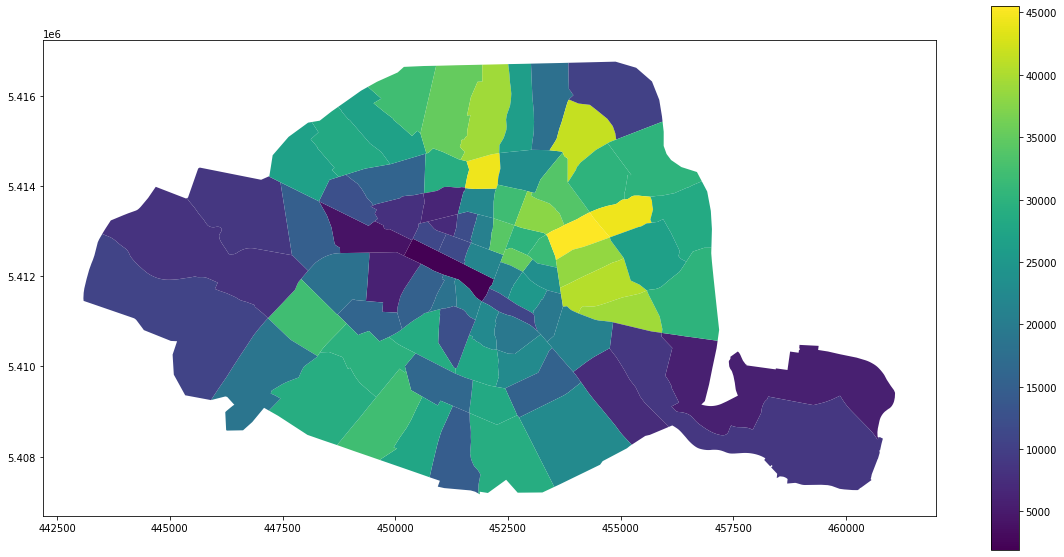

In [ ]:
ax=districts.plot(figsize=(20, 10), column="population_density", legend=True)  